In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import ipywidgets
from ipywidgets import interact

In [2]:
def show(img):
    if img.ndim == 2:
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.show()

def imshow(img):
    if img.ndim == 2:
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

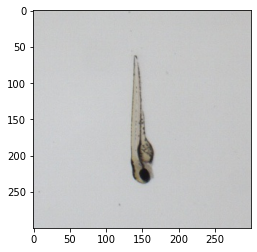

In [3]:
# 读取彩色图像
img_bgr = cv.imread('./data/test2.jpg')
show(img_bgr)

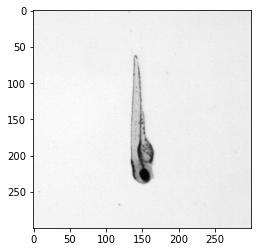

In [4]:
# 读取灰度图像
img_gray = cv.imread('data/test2.jpg', 0)
show(img_gray)

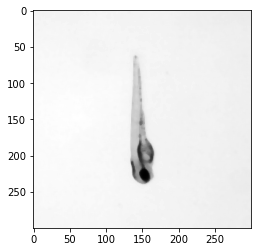

In [5]:
# 中值滤波
img_median = cv.medianBlur(img_gray, ksize=5)
show(img_median)

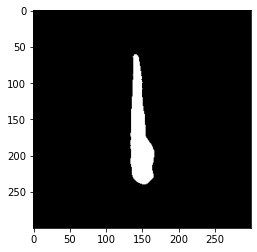

In [6]:
# 自适应阈值分割
blocksize = 40
thresh = 5
img_bin = cv.adaptiveThreshold(img_median, 255, cv.ADAPTIVE_THRESH_MEAN_C,
                       cv.THRESH_BINARY_INV, 2 * int(blocksize) + 1, int(thresh))
show(img_bin)

In [7]:
def IntSlider(value, **kwargs):
    """ 
    Creates an ipwidgets IntSlider with continuous update
    turned off
    """
    return ipywidgets.IntSlider(value, continuous_update=False, **kwargs)

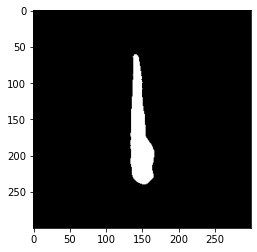

In [8]:
img_bin = np.zeros_like(img_median)
def interactive_adapt(blocksize,thresh):
    global img_gray,img_bin
    fig = plt.figure("Binary",figsize=(20, 20))
    if img_bin is not None: plt.close(fig)
    img_bin = cv.adaptiveThreshold(img_median, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY_INV, 2*int(blocksize)+1, int(thresh))
    plt.imshow(img_bin,cmap='gray')
    
interact(interactive_adapt,           
         blocksize=IntSlider(value=40, min=0, max=50), 
         thresh=IntSlider(value=5, min=0, max=100), 
         );